**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [4]:
c2_df=pd.read_csv('2Classdata.csv')
c2_df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [5]:
print(c2_df.head(10))
print(c2_df.tail(10))

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   
5         40.250200            13.921907              25.124950     26.328293   
6         53.432928            15.864336              37.165934     37.568592   
7         45.366754            10.755611              29.038349     34.611142   
8         43.790190            13.533753              42.690814     30.256437   
9         36.686353             5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal 

In [6]:
c2_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [7]:
c2_df['class'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [8]:
c2_df.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [9]:
c2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


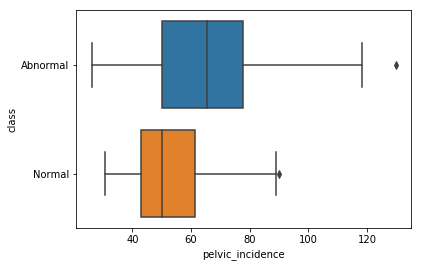

In [10]:
sns.boxplot(x=c2_df['pelvic_incidence'],y=c2_df['class'])

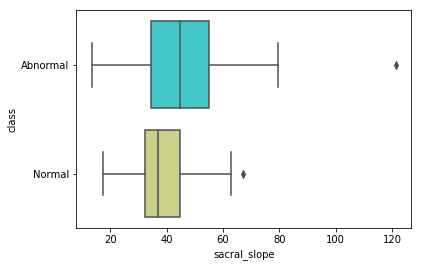

In [11]:
sns.boxplot(x='sacral_slope',y='class',data=c2_df,palette='rainbow')

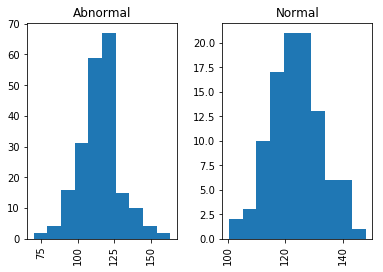

In [12]:
c2_df.hist(by='class',column='pelvic_radius')
plt.show()

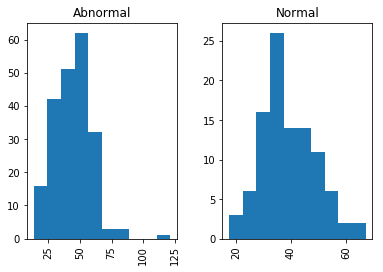

In [13]:
c2_df.hist(by='class',column='sacral_slope')
plt.show()

In [16]:
c2_df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


# Encode the Class variable to integer.

In [19]:
from sklearn import preprocessing

In [22]:
label_encoder=preprocessing.LabelEncoder()
c2_df['class']=label_encoder.fit_transform(c2_df['class'])
c2_df['class'].unique()

array([0, 1], dtype=int64)

In [23]:
c2_df.tail(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,1
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,1
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,1
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,1
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,1
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [25]:
X=c2_df.drop(labels="class",axis=1)
Y=c2_df[["class"]]

In [27]:
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


In [28]:
Y

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


# Normalize your Data (X) to get values between 0 to 1.

In [30]:
X=X.apply(zscore)

In [31]:
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
5,-1.176524,-0.362375,-1.447086,-1.240579,0.933162,-0.641789
6,-0.410474,-0.167980,-0.797069,-0.401840,0.199074,-0.541574
7,-0.879201,-0.679253,-1.235826,-0.622522,-0.048932,-0.985977
8,-0.970815,-0.401221,-0.498816,-0.947465,0.532664,-0.346886
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556


# Split the dat as train and test with a ratio of 70:30.

In [33]:
test_size=0.30 #30:70 ratio
seed=7

In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(217, 6)
(217, 1)
(93, 6)
(93, 1)


# Build the KNN model using Train Dataset and predict the class on test dataset.

In [36]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
NNH=KNeighborsClassifier()
NNH.fit(x_train,y_train)
predicted_labels=NNH.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [40]:
NNH.score(x_test,y_test)

0.7956989247311828

In [41]:
metrics.confusion_matrix(y_test,predicted_labels)

array([[54,  5],
       [14, 20]], dtype=int64)

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [43]:
maxk=int(np.sqrt(x_train.shape[0]))
maxk

14

In [54]:
optimalk=3
optimaltrainaccuracy=0

In [55]:
for k_i in range (maxk):
    if(((k_i % 2)!=0)& (k_i>1)):
        NNH=KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(x_train,y_train)
        if(NNH.score(x_train,y_train)>optimaltrainaccuracy):
            optimalk= k_i
            optimaltrainaccuracy=NNH.score(x_train,y_train)           
            
print(optimalk,optimaltrainaccuracy)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

3 0.9262672811059908


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [60]:
c3_df=pd.read_csv('3Classdata.csv')
c3_df.head(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Hernia
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Hernia
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Hernia
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Hernia
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Hernia


In [61]:
print(c3_df.head(10))
print(c3_df.tail(10))

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   
5         40.250200    13.921907              25.124950     26.328293   
6         53.432928    15.864336              37.165934     37.568592   
7         45.366754    10.755611              29.038349     34.611142   
8         43.790190    13.533753              42.690814     30.256437   
9         36.686353     5.010884              41.948751     31.675469   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.5

In [62]:
c3_df.isnull().sum()

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

In [63]:
c3_df['class'].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [64]:
c3_df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [65]:
c3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


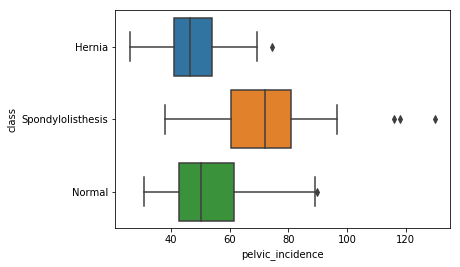

In [66]:
sns.boxplot(x=c3_df['pelvic_incidence'],y=c3_df['class'])

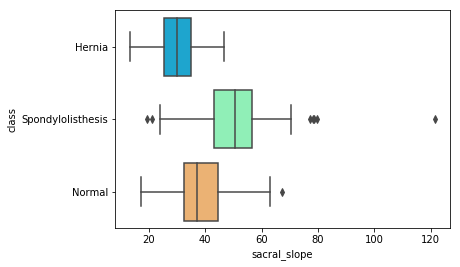

In [67]:
sns.boxplot(x='sacral_slope',y='class',data=c3_df,palette='rainbow')

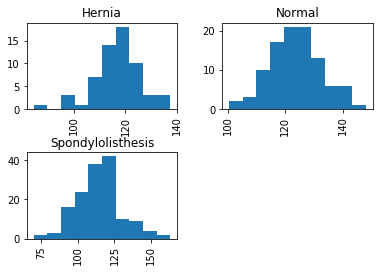

In [68]:
c3_df.hist(by='class',column='pelvic_radius')
plt.show()

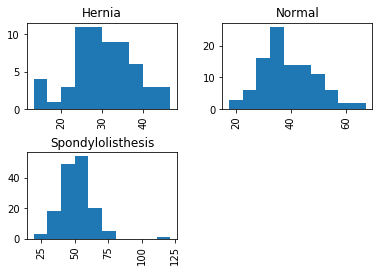

In [69]:
c3_df.hist(by='class',column='sacral_slope')
plt.show()

In [70]:
c3_df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


In [71]:
from sklearn import preprocessing

label_encoder=preprocessing.LabelEncoder()
c3_df['class']=label_encoder.fit_transform(c3_df['class'])
c3_df['class'].unique()

array([0, 2, 1], dtype=int64)

In [72]:
c3_df.tail(10)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
300,50.676677,6.461501,35.000000,44.215175,116.587970,-0.214711,1
301,89.014875,26.075981,69.021259,62.938894,111.481075,6.061508,1
302,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,1
303,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,1
304,45.075450,12.306951,44.583177,32.768499,147.894637,-8.941709,1
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,1
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,1
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,1
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,1
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,1


In [74]:
X=c3_df.drop(labels="class",axis=1)
Y=c3_df[["class"]]

In [75]:
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437


In [76]:
X=X.apply(zscore)
X

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
5,-1.176524,-0.362375,-1.447086,-1.240579,0.933162,-0.641789
6,-0.410474,-0.167980,-0.797069,-0.401840,0.199074,-0.541574
7,-0.879201,-0.679253,-1.235826,-0.622522,-0.048932,-0.985977
8,-0.970815,-0.401221,-0.498816,-0.947465,0.532664,-0.346886
9,-1.383620,-1.254175,-0.538875,-0.841579,-2.533058,-0.683556


In [77]:
test_size=0.30 #30:70 ratio
seed=7

In [78]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=seed)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(217, 6)
(217, 1)
(93, 6)
(93, 1)


In [79]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [80]:
NNH=KNeighborsClassifier()
NNH.fit(x_train,y_train)
predicted_labels=NNH.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [81]:

NNH.score(x_test,y_test)

0.7526881720430108

In [82]:
metrics.confusion_matrix(y_test,predicted_labels)

array([[ 8,  3,  0],
       [10, 20,  4],
       [ 4,  2, 42]], dtype=int64)

In [83]:
maxk=int(np.sqrt(x_train.shape[0]))
maxk

14

In [84]:
optimalk=3
optimaltrainaccuracy=0

In [85]:
for k_i in range (maxk):
    if(((k_i % 2)!=0)& (k_i>1)):
        NNH=KNeighborsClassifier(n_neighbors=k_i)
        NNH.fit(x_train,y_train)
        if(NNH.score(x_train,y_train)>optimaltrainaccuracy):
            optimalk= k_i
            optimaltrainaccuracy=NNH.score(x_train,y_train)           
            
print(optimalk,optimaltrainaccuracy)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


3 0.9078341013824884


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
